In [ ]:
from IPython.display import Image

from google.colab import drive
drive.mount('/g')

Mounted at /g


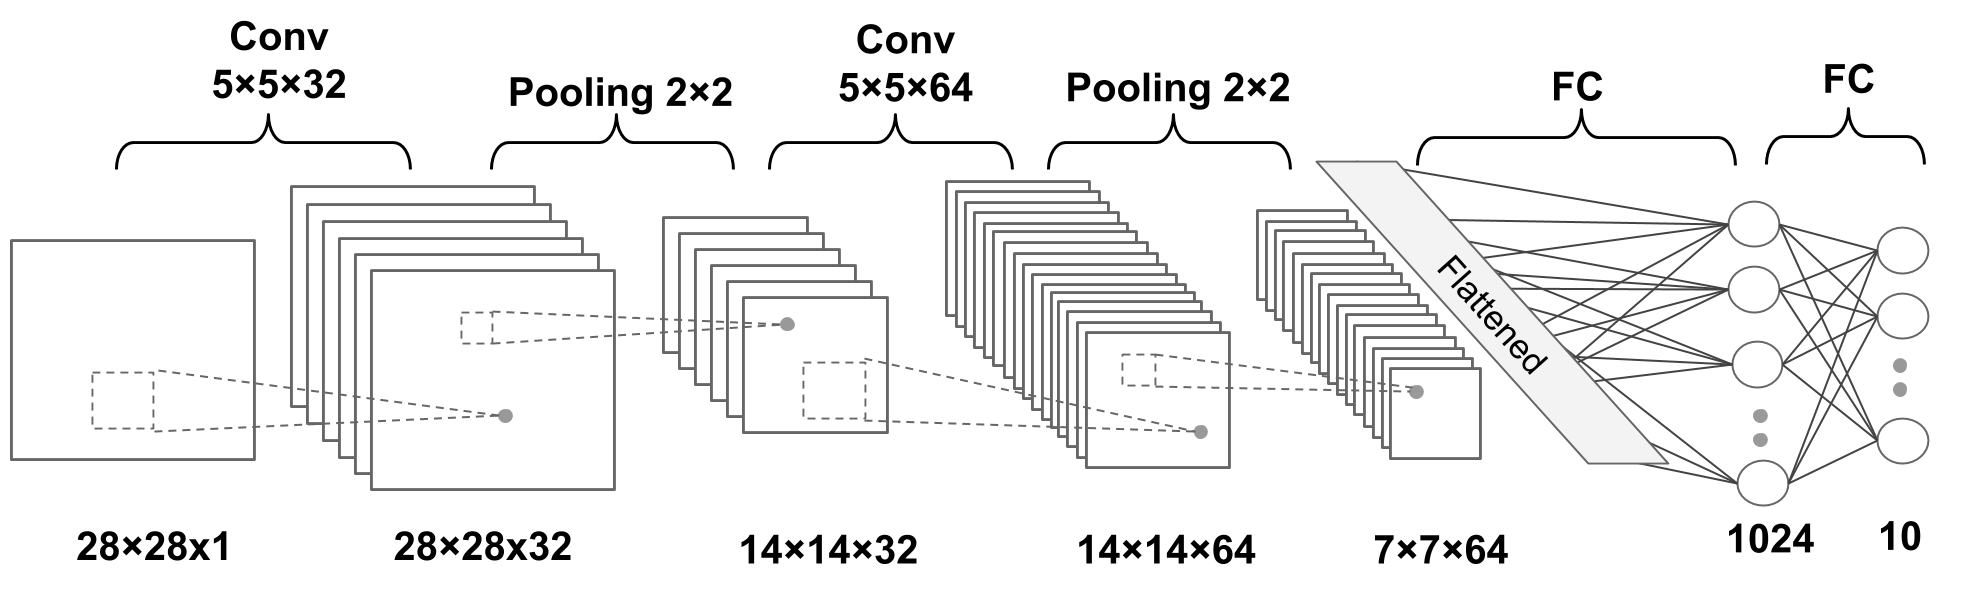

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

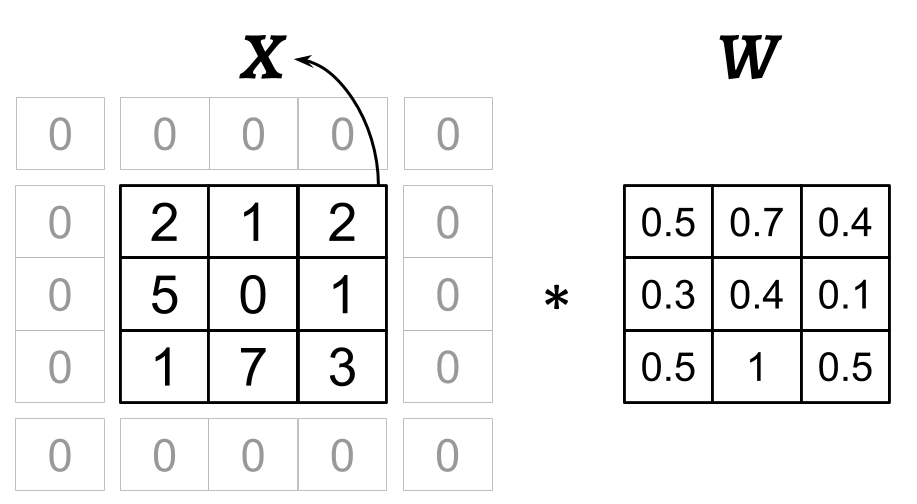

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_06.png', width=600) 

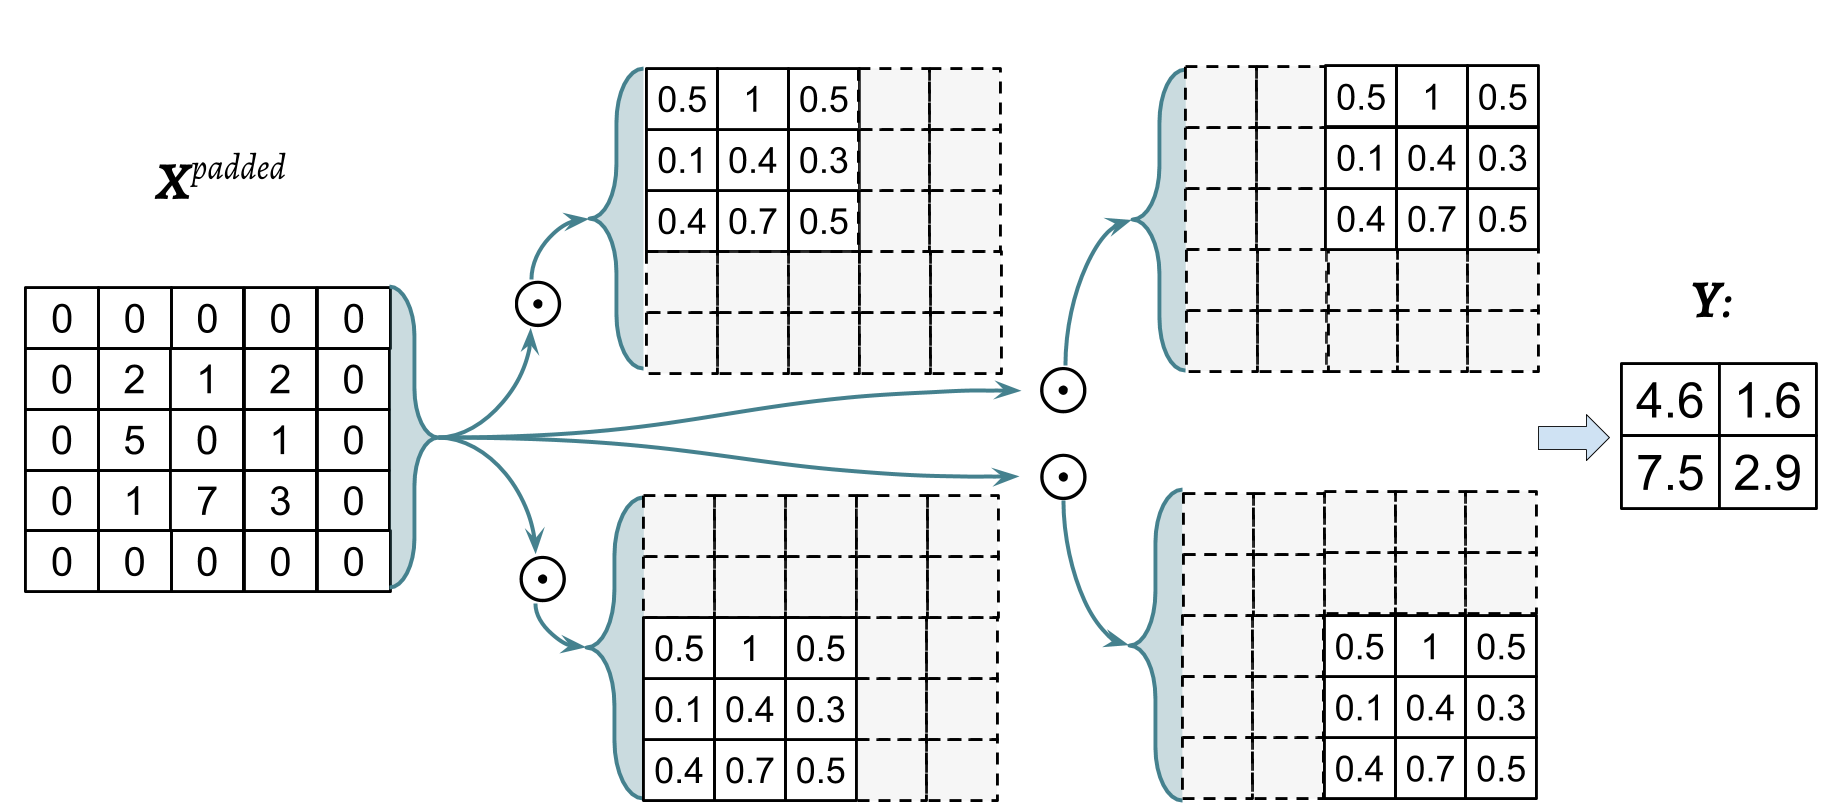

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_07.png', width=600) 

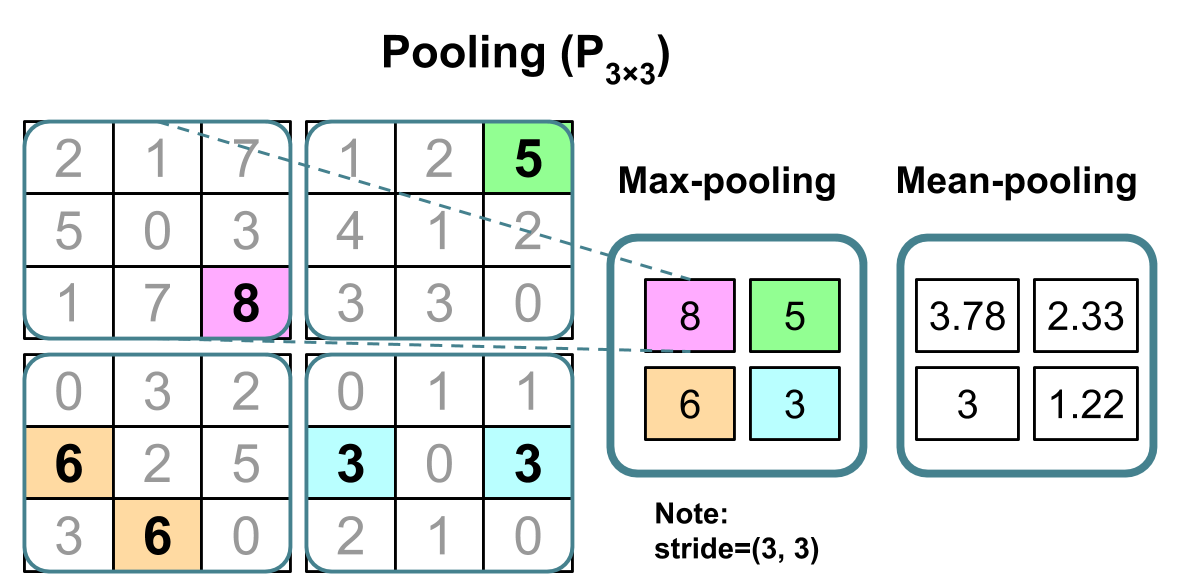

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_08.png', width=600) 

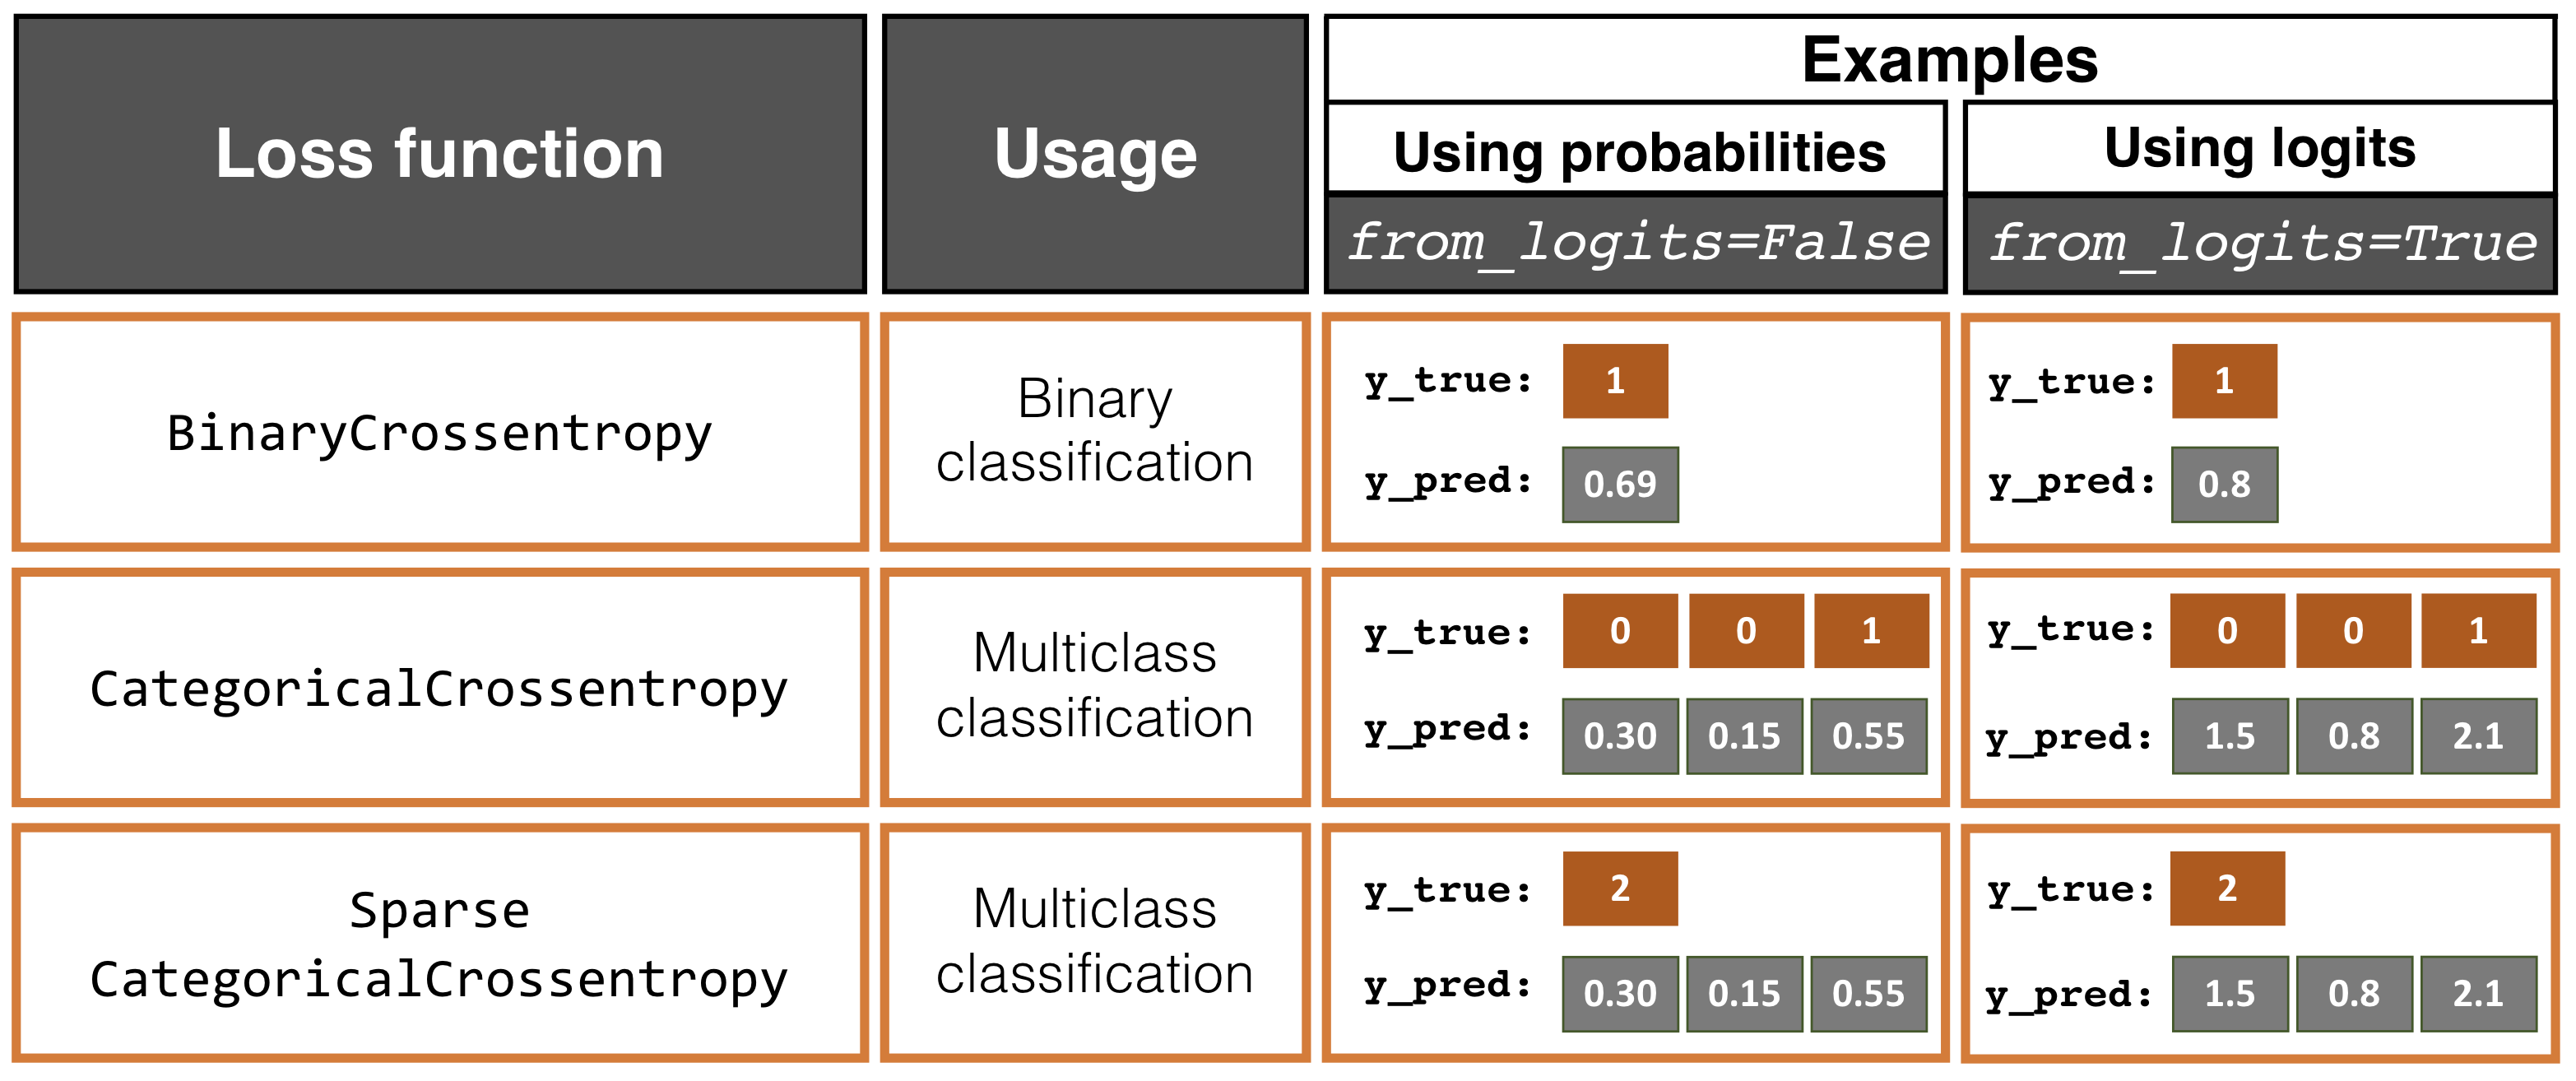

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_11.png', width=600) 

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# train set 에서 10000개를 validation set으로 나눔
x_val, y_val = x_train[50000:,:], y_train[50000:]
x_train, y_train = x_train[:50000, :], y_train[:50000]

In [ ]:
print(x_train.shape)
print(x_val.shape)

(50000, 28, 28)
(10000, 28, 28)


In [ ]:
# 데이터 표준화
import numpy as np
mean = np.mean(x_train, axis=0)

In [ ]:
mean.shape

(28, 28)

In [ ]:
std = np.std(x_train)

In [ ]:
std

78.6661972212754

In [ ]:
x_train_centered = (x_train-mean)/std
x_val_centered = (x_val-mean)/std
x_test_centered = (x_test-mean)/std

In [ ]:
x_train_centered.shape

(50000, 28, 28)

In [ ]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

In [ ]:
print(y_train[0])
print(y_train_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


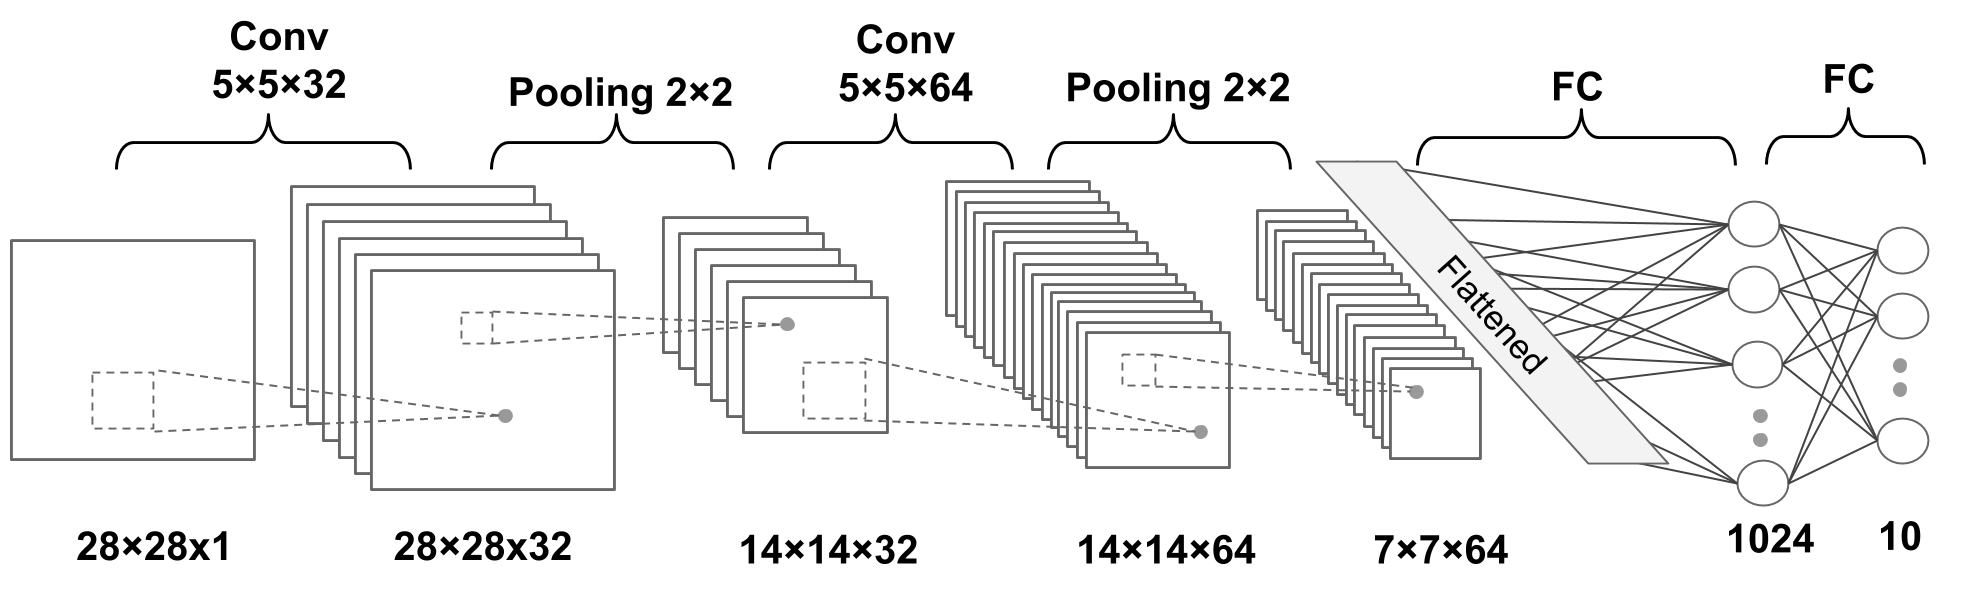

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

코딩은 아래의 사이즈로 진행하였습니다

28x28x1 --> 24x24x32 --> 12x12x32 --> 8x8x64--> 4x4x64

In [ ]:
# model 만들기

from tensorflow.keras import layers, models

model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))

In [ ]:
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())


In [ ]:
# dense layer에 넣기
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

In [ ]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot))

Epoch 1/20
782/782 [==============================] - 36s 8ms/step - loss: 0.3039 - acc: 0.9028 - val_loss: 0.0486 - val_acc: 0.9846
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0499 - acc: 0.9845 - val_loss: 0.0355 - val_acc: 0.9908
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0330 - acc: 0.9897 - val_loss: 0.0461 - val_acc: 0.9850
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0251 - acc: 0.9917 - val_loss: 0.0365 - val_acc: 0.9897
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0229 - acc: 0.9931 - val_loss: 0.0392 - val_acc: 0.9891
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.0382 - val_acc: 0.9891
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.0133 - acc: 0.9957 - val_loss: 0.0374 - val_acc: 0.9909
Epoch 8/20
782/782 [==============================] - 5s 7ms/step - loss: 0

# 데이터 변환 확인

In [ ]:
model.layers[0]

In [ ]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[-9.46056470e-02,  2.66171545e-02,  6.40378669e-02,
           -2.21469015e-01,  5.70085086e-02,  3.84247117e-02,
            5.59828877e-02,  2.90274695e-02,  8.23418722e-02,
            3.77679169e-02, -2.84932554e-02,  7.51983449e-02,
            2.13158838e-02,  2.67600771e-02, -1.53268976e-02,
            7.37675056e-02,  2.94128042e-02, -7.82672763e-02,
            6.01124056e-02,  5.13300374e-02, -1.39832243e-01,
           -3.93593945e-02,  3.14731896e-02, -2.16394141e-02,
           -1.28004536e-01,  3.82444039e-02, -3.80653292e-02,
           -4.19597998e-02, -7.66189247e-02,  1.46418631e-01,
            2.11672345e-03, -4.93649989e-02]],
 
         [[ 6.49298355e-02,  1.42123029e-01,  6.74916729e-02,
            3.35876904e-02, -5.84519580e-02, -1.48012424e-02,
            7.35924207e-03,  9.13649891e-03, -1.81931555e-02,
            5.65735884e-02, -1.58547405e-02,  1.58602018e-02,
         

In [ ]:
model.layers[0].weights[0].shape

TensorShape([5, 5, 1, 32])

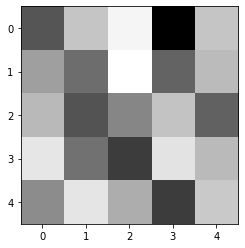

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(model.layers[0].weights[0][:,:,0,0], cmap='gray')

In [ ]:
# conv2d 확인

conv2d_1 = models.Model(inputs=model.input, outputs=model.layers[0].output)

In [ ]:
conv2d_out = conv2d_1.predict(x_train_c[[0]])

In [ ]:
x_train_c.shape

(50000, 28, 28, 1)

In [ ]:
conv2d_out.shape

(1, 24, 24, 32)

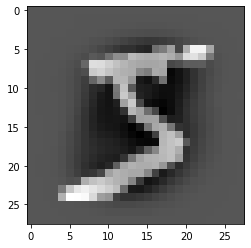

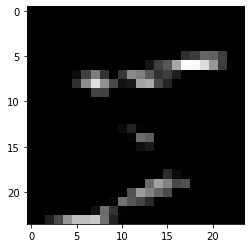

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_c[0,:,:,0], cmap='gray')  # 원본
plt.figure()
plt.imshow(conv2d_out[0,:,:,1],cmap='gray') # convolution

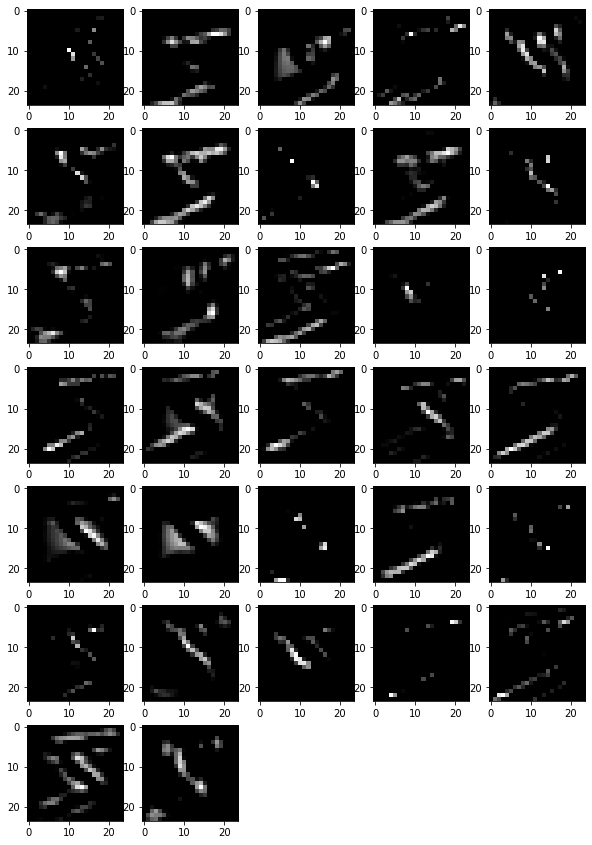

In [ ]:
# 32개 필터 적용된 것 확인
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i], cmap='gray')

In [ ]:
maxpool_1 = models.Model(inputs=model.input, outputs=model.layers[1].output)

In [ ]:
maxpool_out = maxpool_1.predict(x_train_c[[0]])

In [ ]:
maxpool_out.shape

(1, 12, 12, 32)

In [ ]:
maxpool_out.max()

1.894472

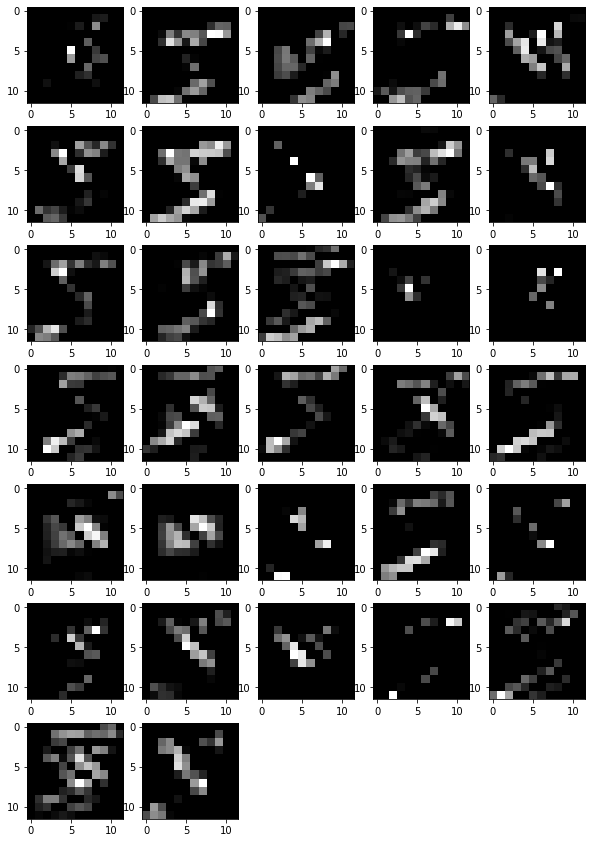

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')

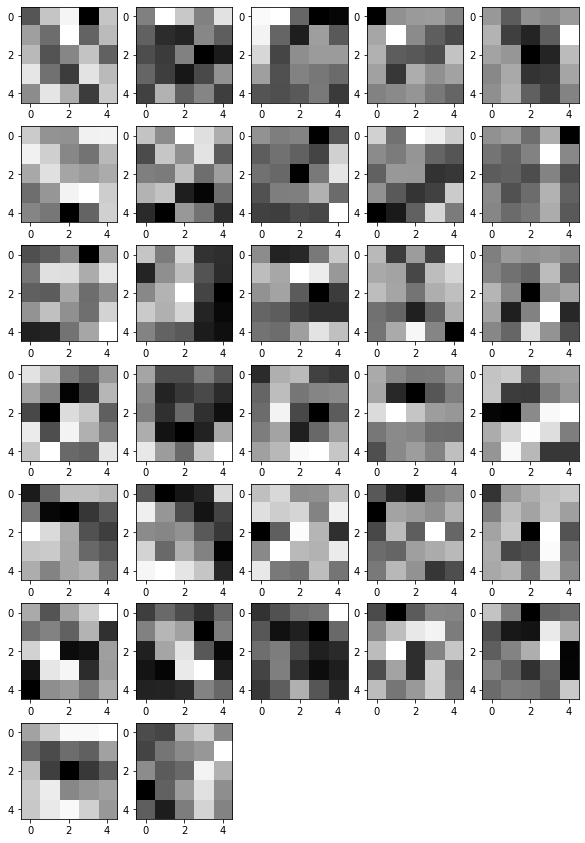

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(model.layers[0].kernel[:,:,0,i], cmap='gray')
plt.show()

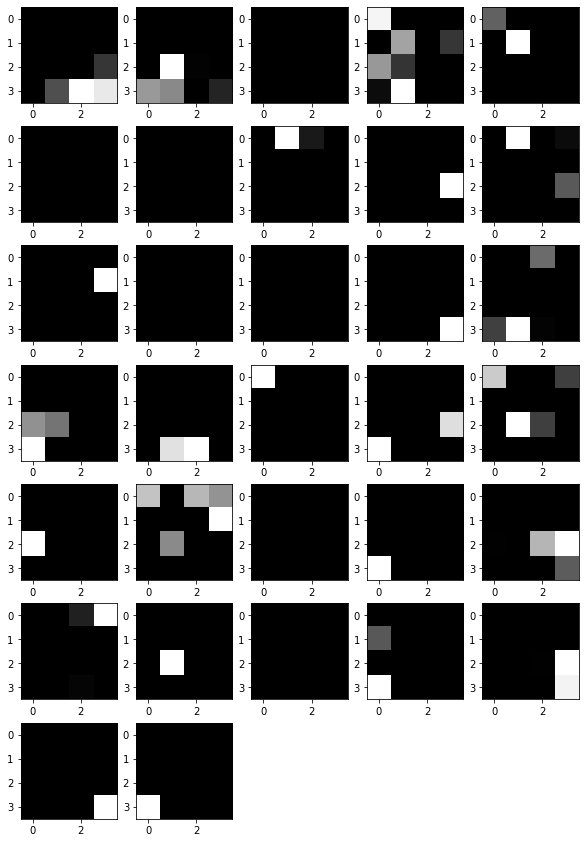

In [ ]:
maxpool_3 = models.Model(inputs=model.input, outputs=model.layers[3].output)
maxpool_out = maxpool_3.predict(x_train_c[[0]])
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')
plt.show()

In [ ]:
flat = models.Model(inputs=model.input, outputs=model.layers[4].output)
flat_out = flat.predict(x_train_c[[0]])

In [ ]:
flat_out

array([[0.        , 0.        , 0.        , ..., 0.54857945, 0.        ,
        0.        ]], dtype=float32)

In [ ]:
import pandas as pd
flat_df = pd.Series(flat_out[0])

In [ ]:
flat_df.describe()

count    1024.000000
mean        0.096244
std         0.376023
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.540958
dtype: float64

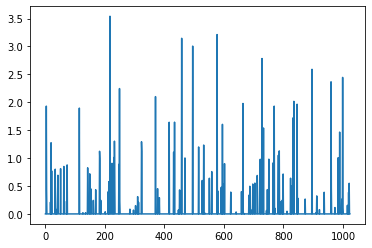

In [ ]:
flat_df.plot()